In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 

$S=\alpha+\eta$

In [113]:
# define parameters and functions:
alpha = .95
epsilon = .1
L = np.pi
Ma = 0

In [114]:
def RHS(t,S):
    N = len(S)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    p = 1/S - Ma/S**2 - epsilon**2*fft.ifft(n**2*(2*np.pi/L*1j)**2*fft.fft(S))#-1/S**2*np.cos(t/2) #p = 1/S-epsilon^2 S_zz
    p_z = fft.ifft(n*(2*np.pi/L*1j)*fft.fft(p))
    factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2 
    #print(np.min(factor))
    dSdt = fft.ifft(n*2*np.pi/L*1j*fft.fft((p_z - 1)*factor)).real/3/S/16 #(S^2)_t
    #print(np.min(S), np.max(S))
    return dSdt
def RHS_thin_film(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + (1-2*Ma)*eta_z + epsilon**2*eta_zzz))).real
    return deta_dt

7


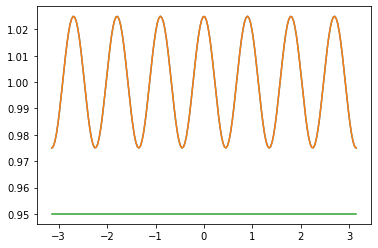

0.975
Solved one
(200, 300)


In [115]:
T = 100
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(-L, L, 200)
t = np.linspace(0,T, 300)
t_span = (0,T)
eta0 =  0.5*np.cos(z*k)*(1-alpha)+(1-alpha)
S0 =  eta0 + alpha
plt.plot(z, S0);plt.plot(z, eta0+alpha);plt.plot(z, np.ones_like(z)*alpha); plt.show()
print(np.min(S0))
#u0 = np.exp(-(z-np.pi)**2)/2 + alpha
result_ivp = scipy.integrate.solve_ivp(RHS, t_span, S0, 'BDF', atol = 1e-2, t_eval =t)
print('Solved one')
result_ivp_thin = scipy.integrate.solve_ivp(RHS_thin_film, t_span, eta0, 'BDF', atol = 1e-2, t_eval =t)
u = result_ivp.y
u_thin = result_ivp_thin.y
print(np.shape(u))


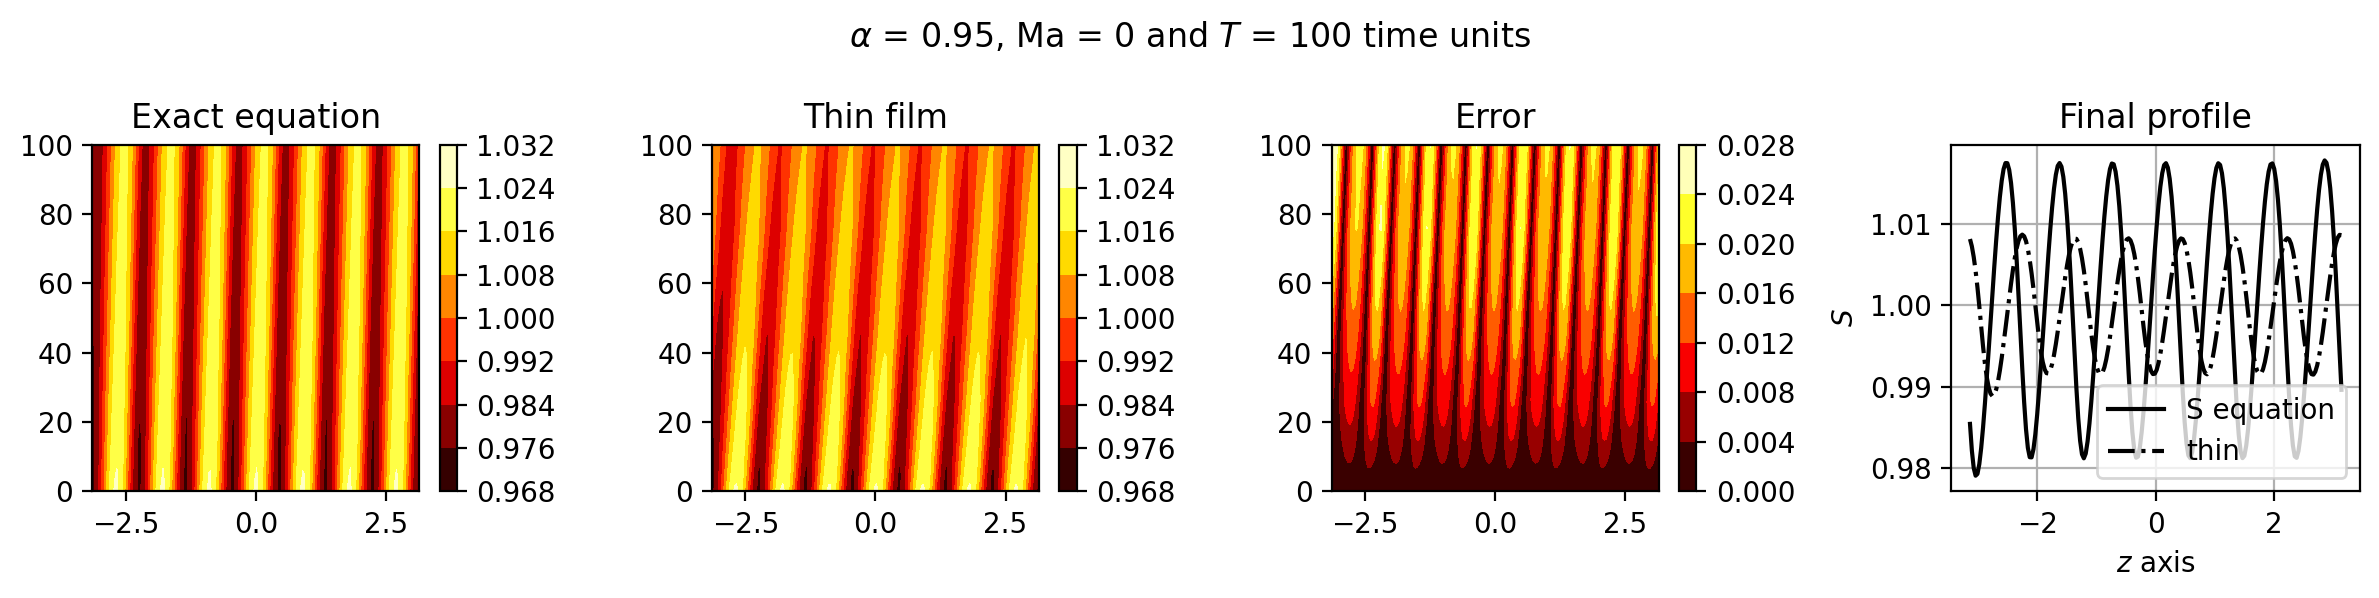

In [116]:
Z,T_ = np.meshgrid(z,t)
fig, ax=plt.subplots(nrows=1, ncols = 4, dpi=200, figsize= (12, 3))
fig.suptitle(fr'$\alpha$ = {alpha}, Ma = {Ma} and $T$ = {T} time units')
c1 = ax[0].contourf(Z,T_,u.T, cmap ='hot')
c2 = ax[1].contourf(Z,T_,u_thin.T+alpha, cmap='hot')
c3 = ax[2].contourf(Z,T_,abs(u.T-u_thin.T-alpha), cmap='hot')
fig.colorbar(c1, ax=ax[0])
fig.colorbar(c2, ax=ax[1])
fig.colorbar(c3, ax=ax[2])
ax[0].set_title('Exact equation')
ax[1].set_title('Thin film')
ax[2].set_title('Error')
ax[3].plot(z, u[:,-1], color ='black', label='S equation')
ax[3].plot(z, u_thin[:,-1]+alpha, '-.',color='black', label='thin')
ax[3].grid()
ax[3].set_title('Final profile')
ax[3].set_xlabel(r'$z$ axis')
ax[3].set_ylabel(r'$S$')
ax[3].legend()
plt.tight_layout()
plt.savefig(f'simulation_Ma_{Ma}_alpha_{alpha}.pdf')
plt.show()


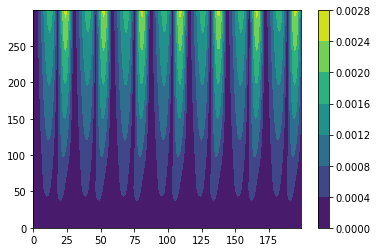

In [74]:
plt.contourf(abs(u.T-u_thin.T-alpha));plt.colorbar()